## Case 1 deterministic

Here we consider an


$$ y = x^2 - 9x + 14 $$

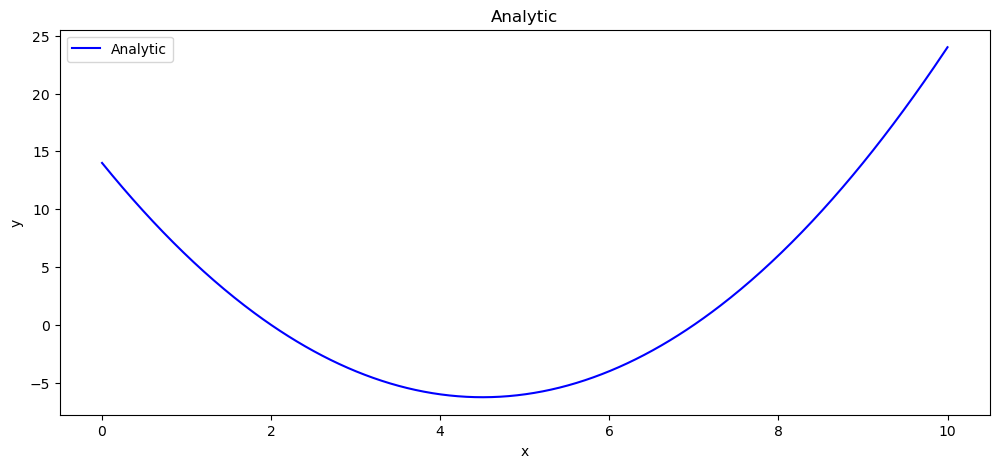

In [83]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

f_true = lambda x: x**2 - 9*x + 14

X_test = np.linspace(0,10,500)

Y_true = np.array([f_true(xt) for xt in X_test])


# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X_test, Y_true, label="Analytic", color="blue")


plt.title(f"Analytic")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# fig_name = f"c1_pce_{n}p{degree}d"
# plt.savefig('figs/'+fig_name)
plt.show()


In [84]:
# data generation
X_train = np.arange(0,11,2)
Y_train = f_true(X_train)

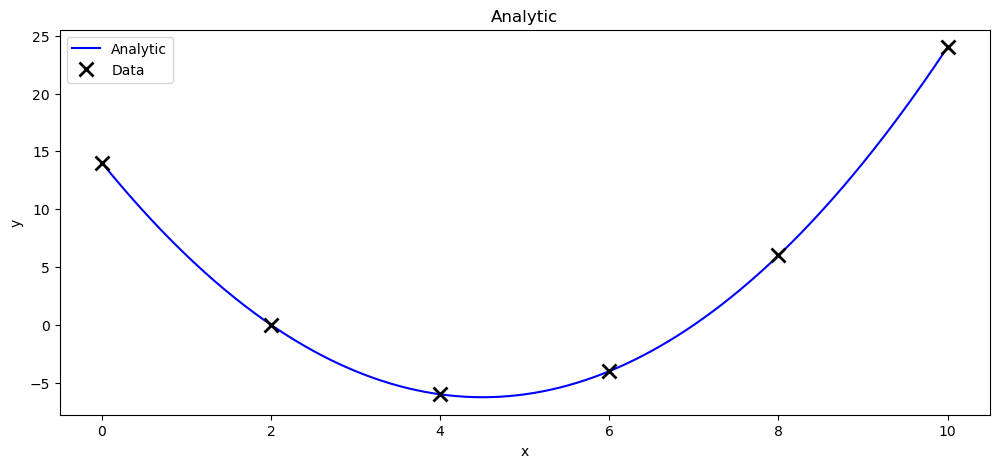

In [85]:
# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X_test, Y_true, label="Analytic", color="blue")
plt.plot(X_train, Y_train, 'kx', markersize=10, markeredgewidth=2, label="Data")


plt.title(f"Analytic")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# fig_name = f"c1_pce_{n}p{degree}d"
# plt.savefig('figs/'+fig_name)
plt.show()

In [86]:
import chaospy as cp

# Define the range of the input
q_pce = cp.Uniform(0, 10)
# q_pce = cp.Normal(0, 10)

# Create an orthogonal polynomial basis
degree = 4  # Degree of the polynomial
polynomials_pce = cp.orth_ttr(degree, q_pce)

# Fit the PCE model to the data
pce_model_cp = cp.fit_regression(polynomials_pce, X_train, Y_train)

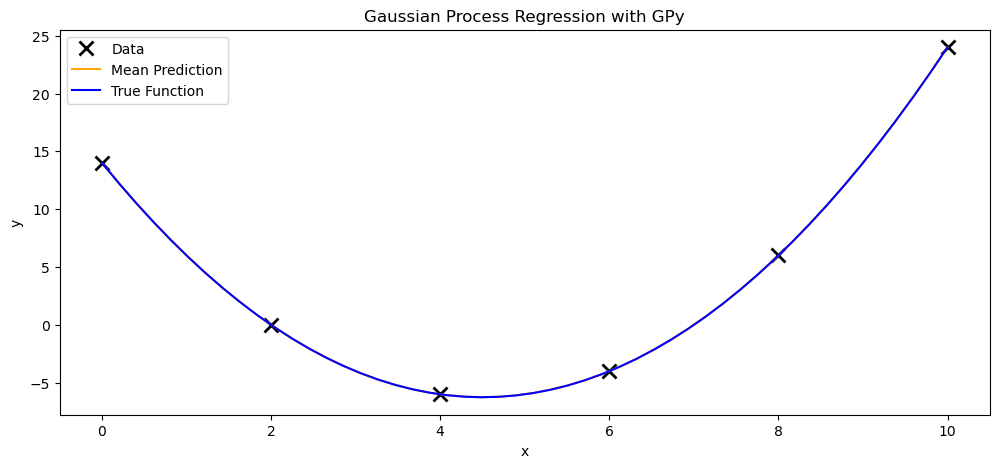

In [87]:
# Predict at new data points
X_new = np.linspace(0, 10, 50).reshape(-1, 1)  # Test inputs

y_pred_pce = pce_model_cp(X_new)
y_std_pce = np.sqrt(cp.Var(pce_model_cp, q_pce))
Y_var = cp.E((pce_model_cp - cp.E(pce_model_cp, q_pce))**2, q_pce)

Y_true = np.array([f_true(xn) for xn in X_new])

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X_train, Y_train, 'kx', markersize=10, markeredgewidth=2, label="Data")

plt.plot(X_new, y_pred_pce, label='Mean Prediction', color='orange')
plt.plot(X_new, Y_true, label="True Function", color="blue")

plt.title(f"Gaussian Process Regression with GPy")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [88]:
y_std_pce

7.9930525388545135